# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [ ]:
# If on colab, uncomment the following lines

# ! wget https://raw.githubusercontent.com/girafe-ai/ml-mipt/21f_basic/homeworks_basic/Lab1_ML_pipeline_and_SVM/car_data.csv

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [2]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,531,107,55,103,167,49,7,252,27,28,172,269,904,239,83,5,30,179,186
1,72,92,39,91,191,62,8,176,37,21,137,196,466,151,67,3,23,192,200
2,673,91,35,66,159,59,7,147,45,19,131,169,322,123,64,1,1,197,203
3,467,96,54,104,175,58,10,215,31,24,175,221,682,222,75,13,23,186,194
4,530,88,48,90,178,60,8,175,38,21,152,200,460,198,68,13,16,192,199
5,495,94,45,72,179,69,6,156,41,19,144,181,373,191,69,5,5,193,198
6,20,84,47,75,153,64,6,154,43,19,145,175,354,184,75,0,3,185,192
7,281,82,43,73,154,65,7,151,44,19,143,178,341,160,76,5,11,185,189
8,746,91,42,66,142,58,9,134,50,18,142,163,268,164,69,6,5,191,197
9,81,99,51,92,203,65,5,209,31,24,159,232,671,214,78,5,11,191,189


Methods `describe` and `info` deliver some useful information.

In [3]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,422.661202,93.985428,44.859745,82.382514,170.242259,61.801457,8.581056,169.918033,40.644809,20.666667,147.874317,189.659381,445.737705,175.032787,72.444444,6.378871,12.617486,189.074681,195.714026
std,242.245340,8.257698,6.247364,15.978982,33.800693,8.037930,4.846860,33.222412,7.846816,2.586461,14.627761,31.222398,176.558804,33.477507,7.201170,4.807080,8.962582,6.213938,7.422852
min,1.000000,73.000000,33.000000,40.000000,110.000000,47.000000,2.000000,112.000000,26.000000,17.000000,119.000000,130.000000,184.000000,109.000000,60.000000,0.000000,0.000000,176.000000,181.000000
25%,211.000000,87.000000,40.000000,70.000000,143.000000,57.000000,6.000000,147.000000,33.000000,19.000000,136.000000,169.000000,321.000000,148.000000,67.000000,2.000000,5.000000,185.000000,191.000000
50%,431.000000,93.000000,44.000000,80.000000,169.000000,61.000000,8.000000,159.000000,42.000000,20.000000,146.000000,180.000000,371.000000,174.000000,72.000000,6.000000,11.000000,189.000000,197.000000
75%,634.000000,100.000000,50.000000,98.000000,197.000000,65.000000,10.000000,201.000000,46.000000,23.000000,160.000000,219.000000,605.000000,200.000000,75.000000,9.000000,19.000000,193.000000,201.000000
max,845.000000,117.000000,58.000000,112.000000,322.000000,133.000000,55.000000,262.000000,61.000000,28.000000,180.000000,287.000000,987.000000,268.000000,119.000000,22.000000,39.000000,204.000000,211.000000


In [4]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
0     549 non-null int32
1     549 non-null int32
2     549 non-null int32
3     549 non-null int32
4     549 non-null int32
5     549 non-null int32
6     549 non-null int32
7     549 non-null int32
8     549 non-null int32
9     549 non-null int32
10    549 non-null int32
11    549 non-null int32
12    549 non-null int32
13    549 non-null int32
14    549 non-null int32
15    549 non-null int32
16    549 non-null int32
17    549 non-null int32
18    549 non-null int32
dtypes: int32(19)
memory usage: 40.9 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

In [5]:
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

def encode(y):
    y_df = pd.DataFrame(y)
    le = LabelEncoder()
    le.fit(y_df[0])
    y_df[0] = le.transform(y_df[0])
    encoded_y = np.array(y_df[0])
    return encoded_y

encoded_y_train = encode(y_train)
encoded_y_test = encode(y_test)

#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [17]:
from pandas import read_csv
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import scikitplot as skplt

# define model
model = LogisticRegression(
    solver='saga',
    l1_ratio=0,
    multi_class='multinomial',
    tol=1e-3,
    max_iter=500
)
# define evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define search space
space = dict()
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['C'] = [1e-3, 1e-2, 1e-1, 1, 10, 100]
# define search
search = GridSearchCV(model, space, scoring='accuracy', cv=cv)

def process(X_train, X_test, encoded_y_train):
    # execute search
    result = search.fit(X_train, encoded_y_train)
    # summarize result
    print('Best Score: %s' % result.best_score_)
    print('Best Hyperparameters: %s' % result.best_params_)
    #model.fit(X_train, encoded_y_train)
    #y_pred = model.predict(X_test)
    y_pred = result.predict(X_test)
    print('accuracy score is', accuracy_score(encoded_y_test, y_pred))
    print('f1 score is', f1_score(encoded_y_test, y_pred, average=None))
    # plot ROC curves
    y_probas = result.predict_proba(X_test)
    skplt.metrics.plot_roc(encoded_y_test, y_probas)
    plt.show()

In [240]:
process(X_train, X_test, encoded_y_train)

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

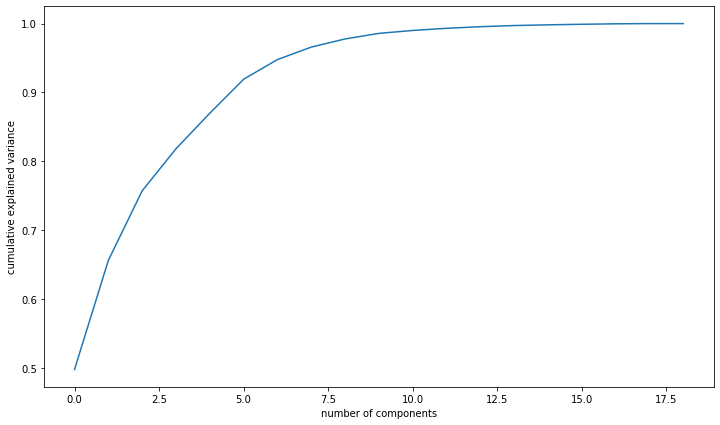

In [13]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardizing the features
normalized_X_train = StandardScaler().fit_transform(X_train[:, :])
normalized_X_test = StandardScaler().fit_transform(X_test[:, :])

plt.figure(figsize=(12, 7))
pca = PCA().fit(normalized_X_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

In [14]:
# as we can see in the graph the variance is practically 1 for 11 components
projected_pca = PCA(n_components=11)
projected_X_train = projected_pca.fit_transform(normalized_X_train)
projected_X_test = projected_pca.fit_transform(normalized_X_test)

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

Best Score: 0.7219186399514268
Best Hyperparameters: {'C': 1, 'penalty': 'l2'}
accuracy score is 0.632996632996633
f1 score is [0.75776398 0.45588235 0.4084507  0.86451613]


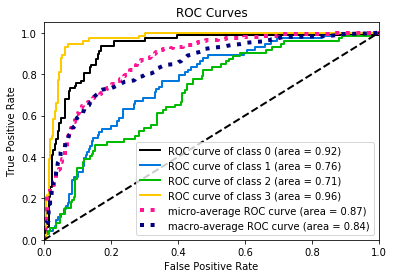

In [18]:
process(projected_X_train, projected_X_test, encoded_y_train)

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

The depth-13 tree achieves the best mean cross-validation accuracy 65.39283 +/- 3.80112% on training dataset


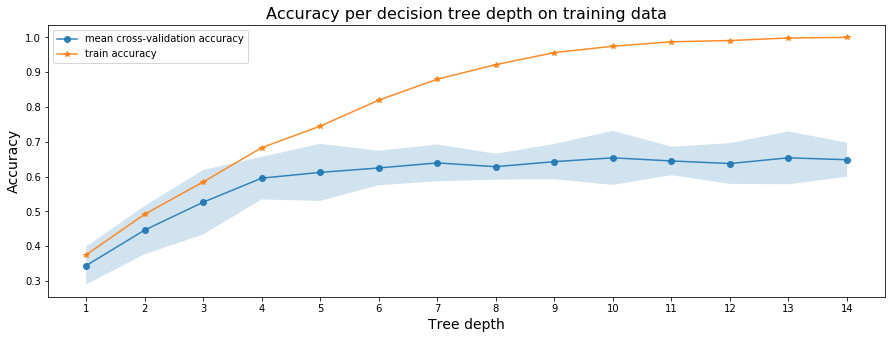

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

#dtc = DecisionTreeClassifier()
#dtc.fit(projected_X_train, encoded_y_train)

tree_depths = range(1, 15)
cv_scores_list = []
cv_scores_std = []
cv_scores_mean = []
accuracy_scores = []
for depth in tree_depths:
    tree_model = DecisionTreeClassifier(max_depth=depth)
    cv_scores = cross_val_score(
        tree_model,
        projected_X_train,
        encoded_y_train,
        cv=5,
        scoring='accuracy'
    )
    cv_scores_list.append(cv_scores)
    cv_scores_mean.append(cv_scores.mean())
    cv_scores_std.append(cv_scores.std())
    accuracy_scores.append(
        tree_model.fit(projected_X_train, encoded_y_train).score(projected_X_train, encoded_y_train)
    )

cv_scores_mean = np.array(cv_scores_mean)
cv_scores_std = np.array(cv_scores_std)
accuracy_scores = np.array(accuracy_scores)

fig, ax = plt.subplots(1, 1, figsize=(15,5))
ax.plot(tree_depths, cv_scores_mean, '-o', label='mean cross-validation accuracy', alpha=0.9)
ax.fill_between(tree_depths, cv_scores_mean-2*cv_scores_std, cv_scores_mean+2*cv_scores_std, alpha=0.2)

ax.plot(tree_depths, accuracy_scores, '-*', label='train accuracy', alpha=0.9)
ax.set_title('Accuracy per decision tree depth on training data', fontsize=16)
ax.set_xlabel('Tree depth', fontsize=14)
ax.set_ylabel('Accuracy', fontsize=14)

ax.set_xticks(tree_depths)
ax.legend()

idx_max = cv_scores_mean.argmax()
best_tree_depth = tree_depths[idx_max]
best_tree_cv_score = cv_scores_mean[idx_max]
best_tree_cv_score_std = cv_scores_std[idx_max]
print('The depth-{} tree achieves the best mean cross-validation accuracy {} +/- {}% on training dataset'.format(
      best_tree_depth, round(best_tree_cv_score*100,5), round(best_tree_cv_score_std*100, 5)))

In [35]:
dtc_model = DecisionTreeClassifier(max_depth=depth).fit(projected_X_train, encoded_y_train)
accuracy_train = dtc_model.score(projected_X_train, encoded_y_train)
accuracy_test = dtc_model.score(projected_X_test, encoded_y_test)
print('Single tree depth: ', depth)
print('Accuracy, Training Set: ', round(accuracy_train*100,5), '%')
print('Accuracy, Test Set: ', round(accuracy_test*100,5), '%')

Single tree depth:  14
Accuracy, Training Set:  100.0 %
Accuracy, Test Set:  57.91246 %


#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# YOUR CODE HERE

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

In [ ]:
# YOUR CODE HERE